In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
a_mobility = pd.read_csv("../applemobilitytrends-2020-07-29.csv") 

In [4]:
nyc_mobility = a_mobility[a_mobility["region"]=="New York City"]
nyc_mobility

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29
642,city,New York City,driving,NYC,New York,United States,100.0,101.51,104.51,108.78,...,118.19,123.11,119.40,123.38,135.89,141.19,115.37,122.71,123.50,129.46
643,city,New York City,transit,NYC,New York,United States,100.0,92.66,95.29,96.42,...,44.56,46.42,42.97,43.37,46.23,51.61,43.28,47.13,46.83,49.14
644,city,New York City,walking,NYC,New York,United States,100.0,96.09,105.77,101.73,...,67.03,72.32,66.10,70.44,78.79,90.53,67.45,70.48,71.98,76.30


In [5]:
nyc_transposed = nyc_mobility.iloc[:,7:].transpose()

In [6]:
nyc_mobility = nyc_transposed.rename(columns={642:"driving",643:"transit",644:"walking"})

In [7]:
nyc_mobility

,driving,transit,walking
2020-01-14,101.51,92.66,96.09
2020-01-15,104.51,95.29,105.77
2020-01-16,108.78,96.42,101.73
2020-01-17,122.44,107.50,117.09
2020-01-18,99.70,101.22,115.37
...,...,...,...
2020-07-25,141.19,51.61,90.53
2020-07-26,115.37,43.28,67.45
2020-07-27,122.71,47.13,70.48
2020-07-28,123.50,46.83,71.98


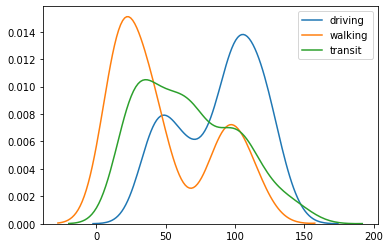

In [96]:
sns.kdeplot(nyc_mobility["driving"].dropna())
sns.kdeplot(nyc_mobility["transit"].dropna())
sns.kdeplot(nyc_mobility["walking"].dropna())
plt.legend(labels=['driving', 'walking', 'transit'])

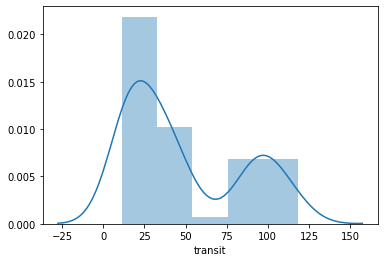

In [9]:
sns.distplot(nyc_mobility["transit"].dropna())

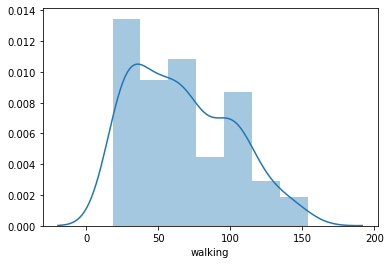

In [10]:
sns.distplot(nyc_mobility["walking"].dropna())

In [11]:
nyc_mobility = nyc_mobility.reset_index()
nyc_mobility = nyc_mobility.rename(columns={"index":"date"})
nyc_mobility

,date,driving,transit,walking
0,2020-01-14,101.51,92.66,96.09
1,2020-01-15,104.51,95.29,105.77
2,2020-01-16,108.78,96.42,101.73
3,2020-01-17,122.44,107.50,117.09
4,2020-01-18,99.70,101.22,115.37
...,...,...,...,...
193,2020-07-25,141.19,51.61,90.53
194,2020-07-26,115.37,43.28,67.45
195,2020-07-27,122.71,47.13,70.48
196,2020-07-28,123.50,46.83,71.98


In [12]:
nyc_driving = nyc_mobility["driving"].tolist()
nyc_transit = nyc_mobility["transit"].tolist()
nyc_walking = nyc_mobility["walking"].tolist()
nyc_mobility_dates = nyc_mobility["date"].tolist()

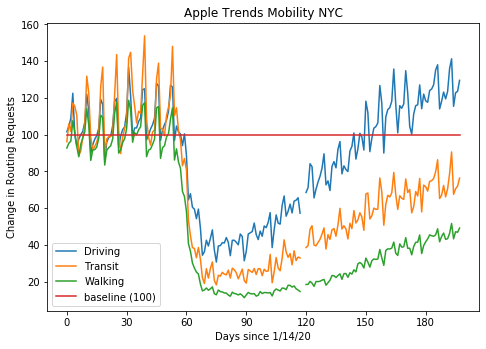

In [14]:
rangeList = list(range(0,198))
map(lambda x: 100, rangeList)
fig_mobility = plt.figure()
amob_axes = fig_mobility.add_axes([1,1,1,1])
amob_axes.plot(range(0,198),nyc_driving, label="Driving")
amob_axes.plot(range(0,198),nyc_walking, label="Transit")
amob_axes.plot(range(0,198),nyc_transit, label="Walking")
amob_axes.plot(range(0,198),list(map(lambda x: 100, rangeList)), label="baseline (100)")
amob_axes.set_title("Apple Trends Mobility NYC")
amob_axes.set_xlabel("Days since 1/14/20")
amob_axes.set_ylabel("Change in Routing Requests")
amob_axes.legend(loc=0)
amob_axes.xaxis.set_ticks(np.arange(0,210,30))

In [15]:
g_mobility = pd.read_csv("../Global_Mobility_Report.csv")
gnyc_mobility = g_mobility[g_mobility["sub_region_1"]=="New York"]

/Users/rcheng11/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
new_york_mob = gnyc_mobility.iloc[:164]
new_york_mob.rename(columns={"retail_and_recreation_percent_change_from_baseline": "Retail & Rec",
                            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery & Pharmacy",
                            "parks_percent_change_from_baseline":"Parks",
                            "transit_stations_percent_change_from_baseline":"Transit",
                            "workplaces_percent_change_from_baseline":"Workplaces",
                            "residential_percent_change_from_baseline": "Residential"}).describe().iloc[:,1:]


,Retail & Rec,Grocery & Pharmacy,Parks,Transit,Workplaces,Residential
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,-34.646341,-7.225610,22.597561,-46.310976,-36.524390,13.914634
std,22.096205,11.819878,46.073657,22.133607,20.959924,9.038705
min,-75.000000,-44.000000,-64.000000,-76.000000,-73.000000,-1.000000
25%,-53.000000,-15.000000,-10.000000,-64.000000,-52.250000,6.000000
50%,-37.500000,-6.000000,16.000000,-50.000000,-43.000000,14.000000
75%,-23.000000,0.000000,55.250000,-40.750000,-19.750000,21.250000
max,10.000000,28.000000,141.000000,3.000000,6.000000,32.000000


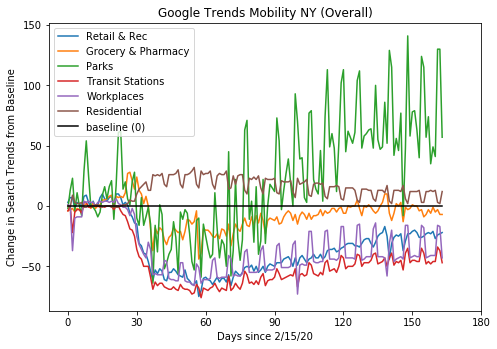

In [66]:
rangeList = list(range(0,164))
map(lambda x: 100, rangeList)
fig_mobility = plt.figure()
amob_axes = fig_mobility.add_axes([1,1,1,1])
amob_axes.plot(range(0,164),new_york_mob["retail_and_recreation_percent_change_from_baseline"], label="Retail & Rec")
amob_axes.plot(range(0,164),new_york_mob["grocery_and_pharmacy_percent_change_from_baseline"], label="Grocery & Pharmacy")
amob_axes.plot(range(0,164),new_york_mob["parks_percent_change_from_baseline"], label="Parks")
amob_axes.plot(range(0,164),new_york_mob["transit_stations_percent_change_from_baseline"], label="Transit Stations")
amob_axes.plot(range(0,164),new_york_mob["workplaces_percent_change_from_baseline"], label="Workplaces")
amob_axes.plot(range(0,164),new_york_mob["residential_percent_change_from_baseline"], label="Residential")
amob_axes.plot(range(0,164),list(map(lambda x: 0, rangeList)), label="baseline (0)",color="black")
amob_axes.set_title("Google Trends Mobility NY (Overall)")
amob_axes.set_xlabel("Days since 2/15/20")
amob_axes.set_ylabel("Change in Search Trends from Baseline")
amob_axes.legend(loc=0)
amob_axes.xaxis.set_ticks(np.arange(0,210,30))

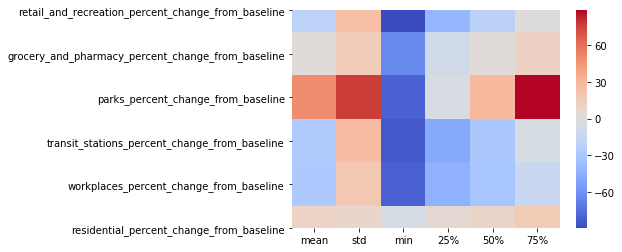

In [168]:
sns.heatmap(gnyc_mobility.describe().iloc[:,1:].iloc[1:7].transpose(), cmap="coolwarm")

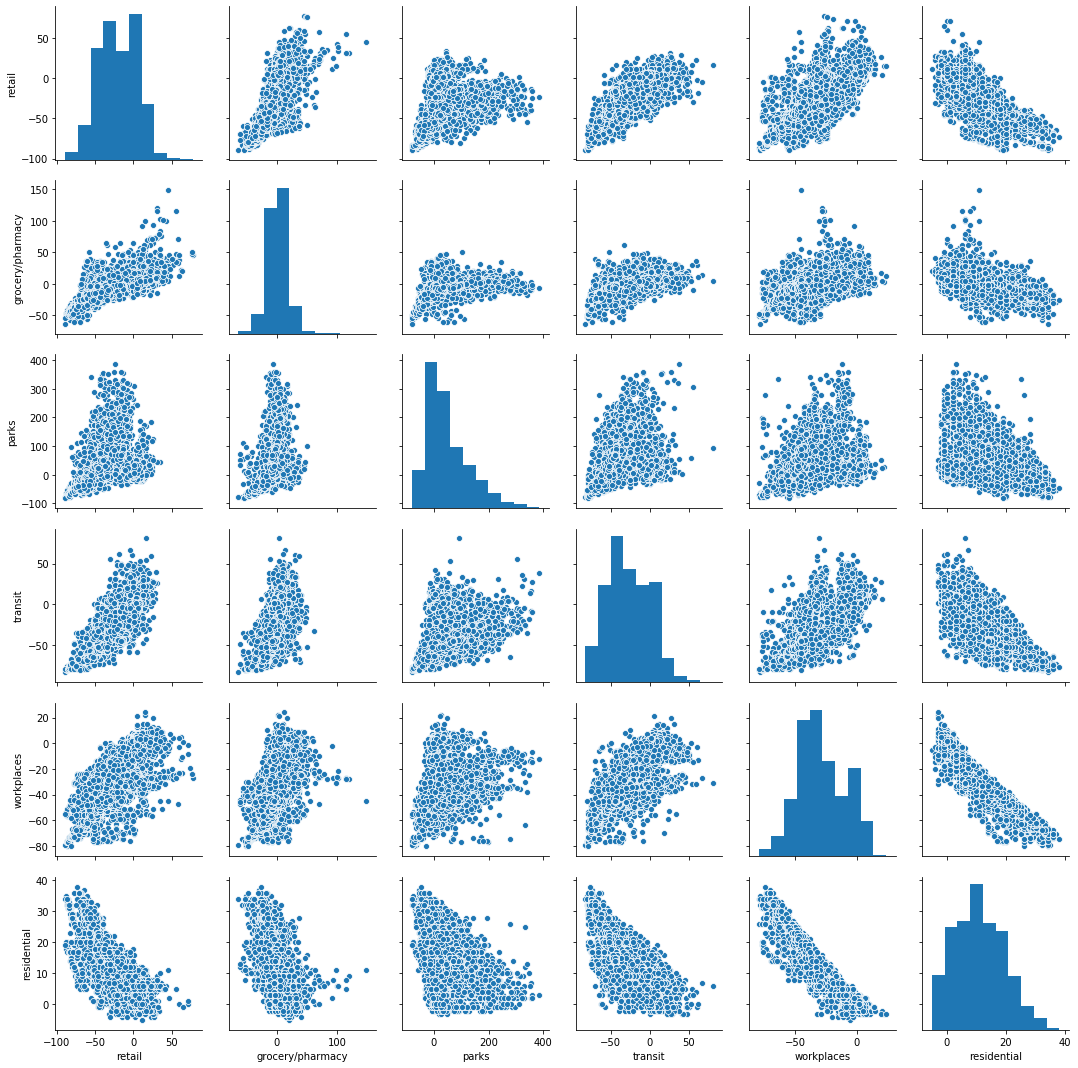

In [192]:
working_gnyc = gnyc_mobility.iloc[:,8:].rename(columns={
    "retail_and_recreation_percent_change_from_baseline":"retail",
    "grocery_and_pharmacy_percent_change_from_baseline":"grocery/pharmacy",
    "parks_percent_change_from_baseline": "parks",
    "transit_stations_percent_change_from_baseline":"transit",
    "workplaces_percent_change_from_baseline":"workplaces",
    "residential_percent_change_from_baseline": "residential"
})
sns.pairplot(working_gnyc)

In [193]:
nyc_boro = pd.read_csv("../NYC Data/coronavirus-data/boro/boroughs-case-hosp-death.csv")

In [194]:
nyc_boro.head()

,DATE_OF_INTEREST,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT
0,02/29/2020,0,4,0,0,3,0,1,2,0,0,2,0,0,0,0
1,03/01/2020,0,0,0,0,1,0,0,0,0,0,2,0,0,1,0
2,03/02/2020,0,4,0,0,9,0,0,4,0,0,4,0,0,0,0
3,03/03/2020,0,5,0,1,7,0,0,2,0,1,5,0,0,1,0
4,03/04/2020,1,5,0,0,6,0,2,6,0,2,3,0,0,2,0


In [195]:
nyc_boro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 16 columns):
DATE_OF_INTEREST         154 non-null object
BK_CASE_COUNT            154 non-null int64
BK_HOSPITALIZED_COUNT    154 non-null int64
BK_DEATH_COUNT           154 non-null int64
BX_CASE_COUNT            154 non-null int64
BX_HOSPITALIZED_COUNT    154 non-null int64
BX_DEATH_COUNT           154 non-null int64
MN_CASE_COUNT            154 non-null int64
MN_HOSPITALIZED_COUNT    154 non-null int64
MN_DEATH_COUNT           154 non-null int64
QN_CASE_COUNT            154 non-null int64
QN_HOSPITALIZED_COUNT    154 non-null int64
QN_DEATH_COUNT           154 non-null int64
SI_CASE_COUNT            154 non-null int64
SI_HOSPITALIZED_COUNT    154 non-null int64
SI_DEATH_COUNT           154 non-null int64
dtypes: int64(15), object(1)
memory usage: 19.4+ KB


In [202]:
nyc_bk = nyc_boro.iloc[:,1:7]
nyc_bk

,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT
0,0,4,0,0,3,0
1,0,0,0,0,1,0
2,0,4,0,0,9,0
3,0,5,0,1,7,0
4,1,5,0,0,6,0
...,...,...,...,...,...,...
149,57,9,1,23,8,1
150,52,11,1,26,8,3
151,43,5,0,18,3,1
152,29,2,1,9,1,0


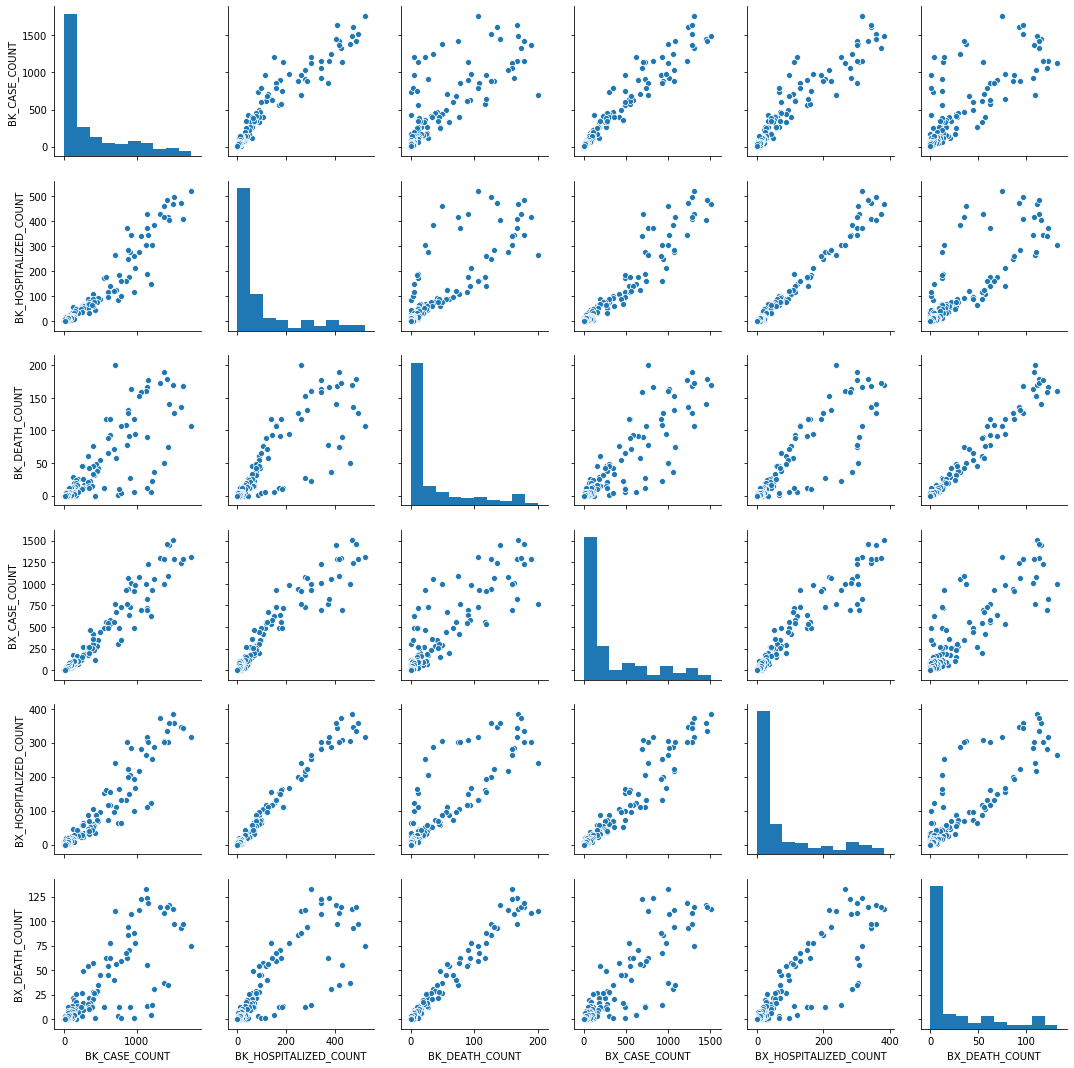

In [203]:
sns.pairplot(nyc_bk)

In [204]:
nyc_bk.corr()

,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT
BK_CASE_COUNT,1.000000,0.955272,0.799378,0.965354,0.948192,0.798413
BK_HOSPITALIZED_COUNT,0.955272,1.000000,0.839030,0.956173,0.989119,0.836083
BK_DEATH_COUNT,0.799378,0.839030,1.000000,0.877050,0.873790,0.984267
BX_CASE_COUNT,0.965354,0.956173,0.877050,1.000000,0.961113,0.874260
BX_HOSPITALIZED_COUNT,0.948192,0.989119,0.873790,0.961113,1.000000,0.871772
BX_DEATH_COUNT,0.798413,0.836083,0.984267,0.874260,0.871772,1.000000


In [209]:
nyc_mn = nyc_boro.iloc[:,7:10]
nyc_mn

,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT
0,1,2,0
1,0,0,0
2,0,4,0
3,0,2,0
4,2,6,0
...,...,...,...
149,42,4,1
150,30,1,1
151,19,2,0
152,10,0,0


In [210]:
nyc_mn.corr()

,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT
MN_CASE_COUNT,1.000000,0.920817,0.687606
MN_HOSPITALIZED_COUNT,0.920817,1.000000,0.806794
MN_DEATH_COUNT,0.687606,0.806794,1.000000


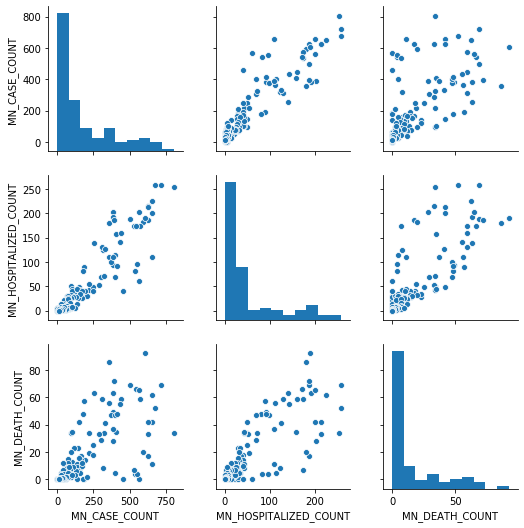

In [211]:
sns.pairplot(nyc_mn)

In [217]:
nyc_qn = nyc_boro.iloc[:,10:13]
nyc_qn

,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT
0,0,2,0
1,0,2,0
2,0,4,0
3,1,5,0
4,2,3,0
...,...,...,...
149,47,11,0
150,34,6,2
151,23,2,1
152,14,0,0


In [88]:
new_york_mob =  new_york_mob.rename(columns={"retail_and_recreation_percent_change_from_baseline": "Retail & Rec",
                            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery & Pharmacy",
                            "parks_percent_change_from_baseline":"Parks",
                            "transit_stations_percent_change_from_baseline":"Transit",
                            "workplaces_percent_change_from_baseline":"Workplaces",
                            "residential_percent_change_from_baseline": "Residential"})


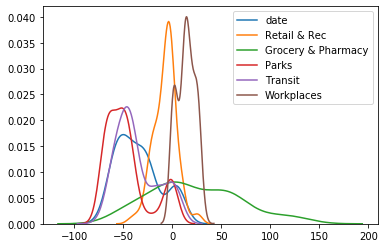

In [105]:
sns.kdeplot(new_york_mob["Retail & Rec"])
sns.kdeplot(new_york_mob["Grocery & Pharmacy"])
sns.kdeplot(new_york_mob["Parks"])
sns.kdeplot(new_york_mob["Transit"])
sns.kdeplot(new_york_mob["Workplaces"])
sns.kdeplot(new_york_mob["Residential"])
plt.legend(labels=new_york_mob.columns[7:])

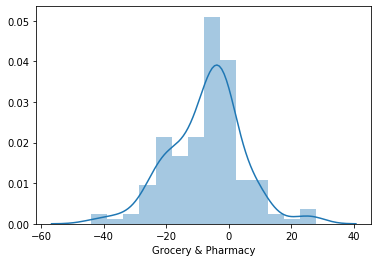

In [91]:
sns.distplot(new_york_mob["Grocery & Pharmacy"])


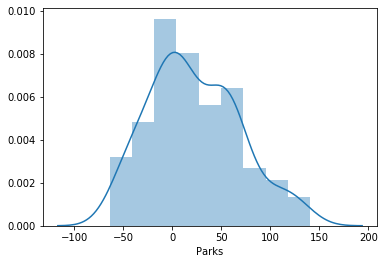

In [97]:
sns.distplot(new_york_mob["Parks"])

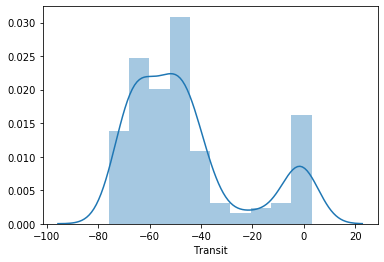

In [98]:
sns.distplot(new_york_mob["Transit"])

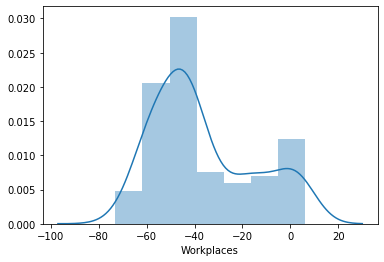

In [99]:
sns.distplot(new_york_mob["Workplaces"])

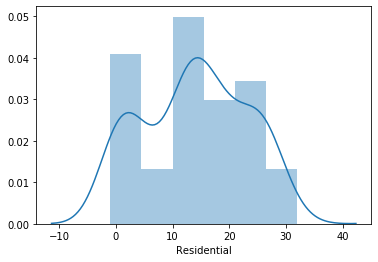

In [100]:
sns.distplot(new_york_mob["Residential"])

In [124]:
df = pd.read_csv("../nyt-data/covid-19-data/us-counties.csv")
ndf = df[((df["county"] == "Nassau")) & (df["state"]=="New York")]
sdf = df[((df["county"] == "Suffolk")) & (df["state"]=="New York")]
ndf

,date,county,state,fips,cases,deaths
564,2020-03-05,Nassau,New York,36059.0,1,0
626,2020-03-06,Nassau,New York,36059.0,4,0
714,2020-03-07,Nassau,New York,36059.0,4,0
819,2020-03-08,Nassau,New York,36059.0,5,0
946,2020-03-09,Nassau,New York,36059.0,17,0
...,...,...,...,...,...,...
387835,2020-07-31,Nassau,New York,36059.0,43203,2706
391052,2020-08-01,Nassau,New York,36059.0,43271,2706
394268,2020-08-02,Nassau,New York,36059.0,43322,2706
397485,2020-08-03,Nassau,New York,36059.0,43380,2706


In [130]:
df = pd.read_csv("../scraped-li-data.csv")

,Date,Index,Daily Cases in Nassau,Daily Cases in Suffolk,Daily Cases in LI,Total Deaths Nassau,Total Deaths Suffolk,Total Deaths in LI,New Deaths Nassau,New Deaths Suffolk,New Deaths in LI,Total Hospitalizations Nassau,Total Hospitalizations Suffolk,Total Hospitalizations on LI,New Hospitalizations in Nassau,New Hospitalizations in Suffolk,New Hospitalizations in LI
0,03/05/2020,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,03/06/2020,2.0,3.0,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,03/07/2020,3.0,2.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,03/08/2020,4.0,4.0,1.0,5.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,03/09/2020,5.0,4.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,07/24/2020,142.0,55.0,49.0,104.0,2193.0,1995,4188.0,0.0,0.0,0.0,48.0,NaN,NaN,NaN,NaN,NaN
142,07/25/2020,143.0,45.0,61.0,106.0,2193.0,1996,4189.0,0.0,1.0,1.0,47.0,NaN,NaN,NaN,NaN,NaN
143,07/26/2020,144.0,57.0,84.0,141.0,2194.0,1996,4190.0,1.0,0.0,1.0,43.0,NaN,NaN,NaN,NaN,NaN
144,07/27/2020,145.0,42.0,57.0,99.0,2194.0,1996,4190.0,0.0,0.0,0.0,39.0,NaN,NaN,NaN,NaN,NaN


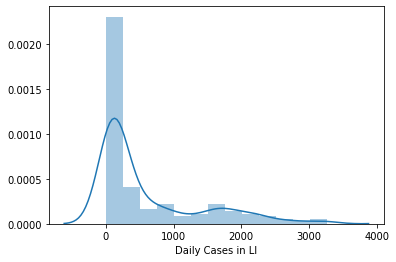

In [132]:
sns.distplot(df["Daily Cases in LI"].dropna())

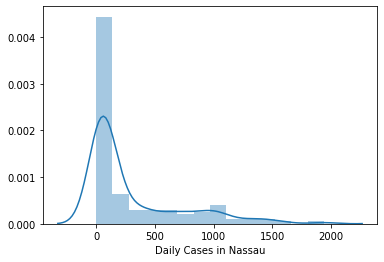

In [133]:
sns.distplot(df["Daily Cases in Nassau"].dropna())

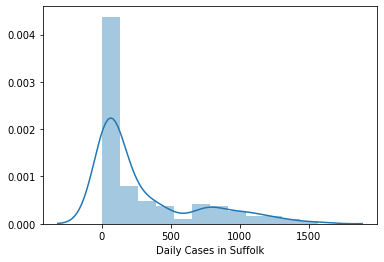

In [134]:
sns.distplot(df["Daily Cases in Suffolk"].dropna())

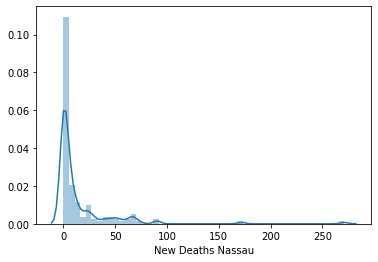

In [135]:
sns.distplot(df["New Deaths Nassau"].dropna())

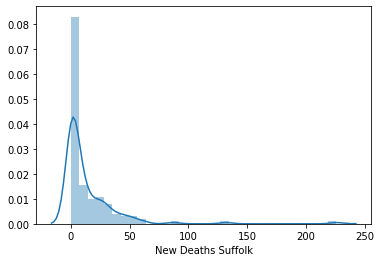

In [136]:
sns.distplot(df["New Deaths Suffolk"].dropna())

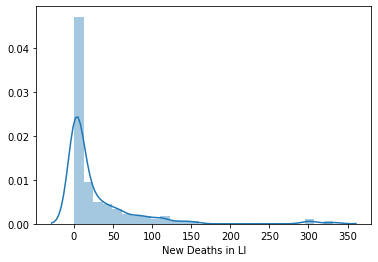

In [138]:
sns.distplot(df["New Deaths in LI"].dropna())